# Score matching for 1D Gassian distribution

* [Denoising Score Matching](https://johfischer.com/2022/09/18/denoising-score-matching/)

In [1]:
import torch
print('torch version = ', torch.__version__)
import torch.nn as nn

torch version =  2.0.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample

device = torch.device('cpu')
#device = torch.device('cuda')
print('device= ', device)

device=  cpu


In [3]:
import learn_1D_score_ex2_tools
from learn_1D_score_ex2_tools import *

The p.d.f. is
$$
\frac{1}{2}\left(N(\mu, \sigma^2) + N(-\mu, \sigma^2)\right)
$$

### Implicit Score Matching (ISM)

#### ISM Loss function
$$
L_{ISM}(\theta) = E_{p(X)}\left(\|s_{\theta}(X)\|^2 + 2\nabla_X \cdot s_{\theta}(X)\right).
$$

In [4]:
N = 10000
mu = 2.0
sigma = 1.0

model =  Plain(
  (ln1): Linear(in_features=1, out_features=10, bias=True)
  (act): Sigmoid()
  (ln2): Linear(in_features=10, out_features=1, bias=True)
)
Number of paramters: 31

Strat training

Adam optimizer, re-sample every  100.0  steps

Iter     0, Loss_Train: 1.38302e-01, Loss_Valid: 1.40051e-01
Iter  1000, Loss_Train: -7.05688e-01, Loss_Valid: -7.04978e-01
Iter  2000, Loss_Train: -7.61663e-01, Loss_Valid: -7.11403e-01
Iter  3000, Loss_Train: -7.33252e-01, Loss_Valid: -7.37128e-01
Iter  4000, Loss_Train: -7.35007e-01, Loss_Valid: -7.46834e-01
change learning rate to 0.001
Iter  5000, Loss_Train: -6.93706e-01, Loss_Valid: -7.35846e-01
Iter  6000, Loss_Train: -7.47568e-01, Loss_Valid: -7.36788e-01
Iter  7000, Loss_Train: -7.28147e-01, Loss_Valid: -7.14588e-01
change learning rate to 0.0001
Iter  8000, Loss_Train: -7.19592e-01, Loss_Valid: -7.18767e-01
Iter  9000, Loss_Train: -7.49349e-01, Loss_Valid: -7.18213e-01
Iter 10000, Loss_Train: -7.11349e-01, Loss_Valid: -7.55986e-01

Evol

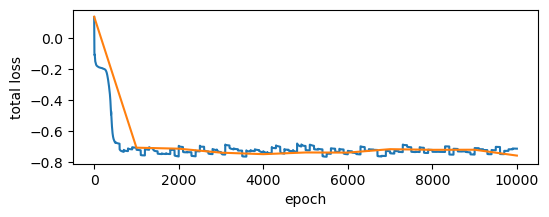

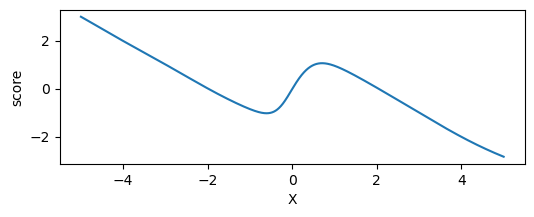

In [5]:
train_model_gauss_ISM(N, mu, sigma)

---

### Denoising Score Matching (DSM)

* Noise function
$$
\tilde{X}_t = X_0 + tz, \quad z\sim \mathcal{N}(0, 1).
$$

#### Loss function

$$
L_{DSM}(\theta)= E_{X\sim p(X)}E_{\tilde{X}|X\sim p_t(\tilde{X}|X)}\left\|t\,s_{\theta}(\tilde{X}, t) + z\right\|^2.
$$


model =  Plain(
  (ln1): Linear(in_features=1, out_features=10, bias=True)
  (act): Sigmoid()
  (ln2): Linear(in_features=10, out_features=1, bias=True)
)
Number of paramters: 31

Strat training

Adam optimizer, re-sample every  100.0  steps

Iter     0, Loss_Res: 1.20232e+00, Loss_Valid: 1.19998e+00
Iter  1000, Loss_Res: 7.29398e-01, Loss_Valid: 7.33812e-01
Iter  2000, Loss_Res: 7.20755e-01, Loss_Valid: 7.50974e-01
Iter  3000, Loss_Res: 7.37696e-01, Loss_Valid: 7.50563e-01
Iter  4000, Loss_Res: 7.41632e-01, Loss_Valid: 7.36458e-01
change learning rate to 0.001
Iter  5000, Loss_Res: 7.14181e-01, Loss_Valid: 7.27950e-01
Iter  6000, Loss_Res: 7.23617e-01, Loss_Valid: 7.25790e-01
Iter  7000, Loss_Res: 7.16454e-01, Loss_Valid: 7.27501e-01
change learning rate to 0.0001
Iter  8000, Loss_Res: 7.47508e-01, Loss_Valid: 7.44916e-01
Iter  9000, Loss_Res: 7.37652e-01, Loss_Valid: 7.38283e-01
Iter 10000, Loss_Res: 7.33681e-01, Loss_Valid: 7.29731e-01

Evolution of loss



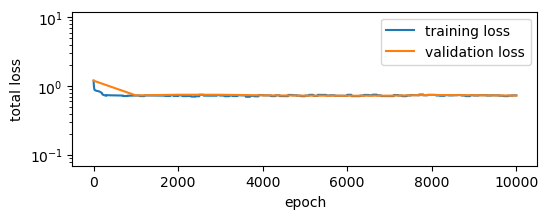

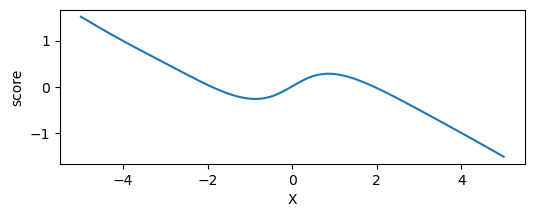

In [6]:
train_model_DSM(N, mu, sigma, 1.0)

model =  Plain(
  (ln1): Linear(in_features=1, out_features=10, bias=True)
  (act): Sigmoid()
  (ln2): Linear(in_features=10, out_features=1, bias=True)
)
Number of paramters: 31

Strat training

Adam optimizer, re-sample every  100.0  steps

Iter     0, Loss_Res: 1.00871e+00, Loss_Valid: 1.00116e+00
Iter  1000, Loss_Res: 9.36680e-01, Loss_Valid: 9.46086e-01
Iter  2000, Loss_Res: 9.66356e-01, Loss_Valid: 9.43732e-01
Iter  3000, Loss_Res: 9.34281e-01, Loss_Valid: 9.48671e-01
Iter  4000, Loss_Res: 9.32221e-01, Loss_Valid: 9.46634e-01
change learning rate to 0.001
Iter  5000, Loss_Res: 9.47307e-01, Loss_Valid: 9.32539e-01
Iter  6000, Loss_Res: 9.35249e-01, Loss_Valid: 9.38021e-01
Iter  7000, Loss_Res: 9.38762e-01, Loss_Valid: 9.63595e-01
change learning rate to 0.0001
Iter  8000, Loss_Res: 9.39521e-01, Loss_Valid: 9.44443e-01
Iter  9000, Loss_Res: 9.59016e-01, Loss_Valid: 9.58470e-01
Iter 10000, Loss_Res: 9.31551e-01, Loss_Valid: 9.57951e-01

Evolution of loss



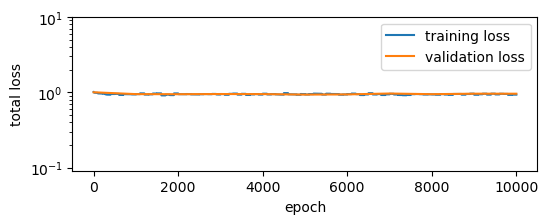

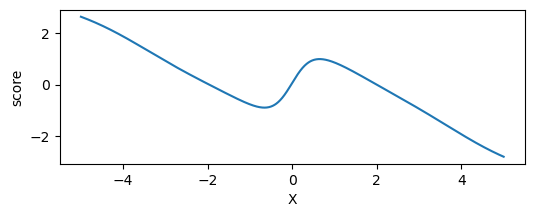

In [7]:
train_model_DSM(N, mu, sigma, 0.3)

model =  Plain(
  (ln1): Linear(in_features=1, out_features=10, bias=True)
  (act): Sigmoid()
  (ln2): Linear(in_features=10, out_features=1, bias=True)
)
Number of paramters: 31

Strat training

Adam optimizer, re-sample every  100.0  steps

Iter     0, Loss_Res: 1.03282e+00, Loss_Valid: 9.84328e-01
Iter  1000, Loss_Res: 1.01373e+00, Loss_Valid: 9.94036e-01
Iter  2000, Loss_Res: 9.71738e-01, Loss_Valid: 9.78046e-01
Iter  3000, Loss_Res: 1.00705e+00, Loss_Valid: 1.01261e+00
Iter  4000, Loss_Res: 9.83516e-01, Loss_Valid: 9.75305e-01
change learning rate to 0.001
Iter  5000, Loss_Res: 9.64466e-01, Loss_Valid: 9.94627e-01
Iter  6000, Loss_Res: 9.92680e-01, Loss_Valid: 9.70448e-01
Iter  7000, Loss_Res: 9.93058e-01, Loss_Valid: 9.95651e-01
change learning rate to 0.0001
Iter  8000, Loss_Res: 1.00811e+00, Loss_Valid: 9.97410e-01
Iter  9000, Loss_Res: 9.82568e-01, Loss_Valid: 9.81474e-01
Iter 10000, Loss_Res: 9.89016e-01, Loss_Valid: 9.62023e-01

Evolution of loss



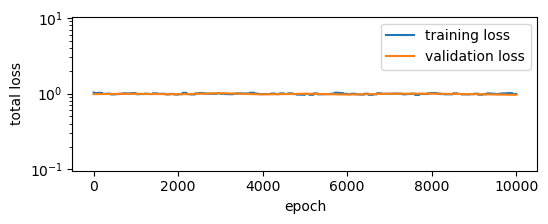

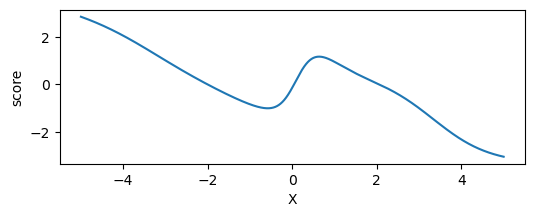

In [8]:
train_model_DSM(N, mu, sigma, 0.1)

model =  Plain(
  (ln1): Linear(in_features=2, out_features=10, bias=True)
  (act): Sigmoid()
  (ln2): Linear(in_features=10, out_features=1, bias=True)
)
Number of paramters: 41

Strat training

Adam optimizer, re-sample every 100 steps

Iter     0, Loss_Res: 1.08194e+00, Loss_Valid: 1.03371e+00
Iter  1000, Loss_Res: 8.78582e-01, Loss_Valid: 8.78105e-01
Iter  2000, Loss_Res: 8.69876e-01, Loss_Valid: 8.93442e-01
Iter  3000, Loss_Res: 8.47020e-01, Loss_Valid: 8.76925e-01
Iter  4000, Loss_Res: 8.69612e-01, Loss_Valid: 8.64516e-01
Iter  5000, Loss_Res: 8.68119e-01, Loss_Valid: 8.66234e-01
Iter  6000, Loss_Res: 8.62162e-01, Loss_Valid: 8.67753e-01
Iter  7000, Loss_Res: 8.56601e-01, Loss_Valid: 8.99859e-01
Iter  8000, Loss_Res: 8.77248e-01, Loss_Valid: 8.81403e-01
change learning rate to 0.001
Iter  9000, Loss_Res: 8.51121e-01, Loss_Valid: 8.79823e-01
change learning rate to 0.0001
Iter 10000, Loss_Res: 8.50567e-01, Loss_Valid: 8.60217e-01

Evolution of loss



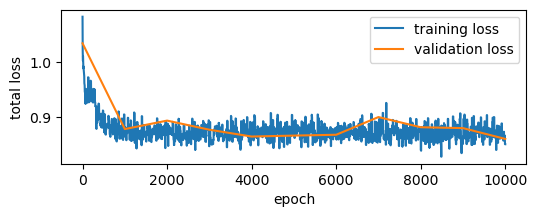

solution and errors:

t =  0.0


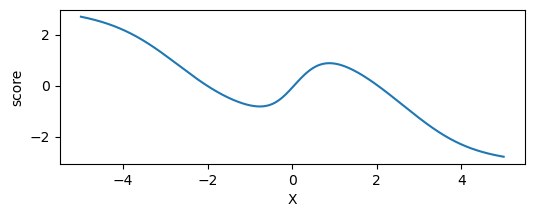

t =  0.1


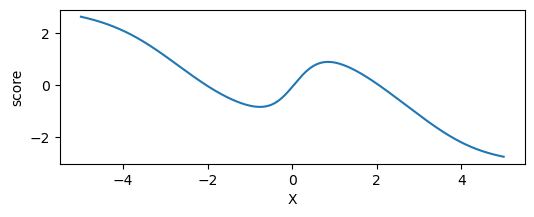

t =  1.0


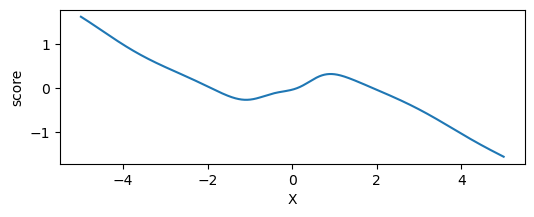

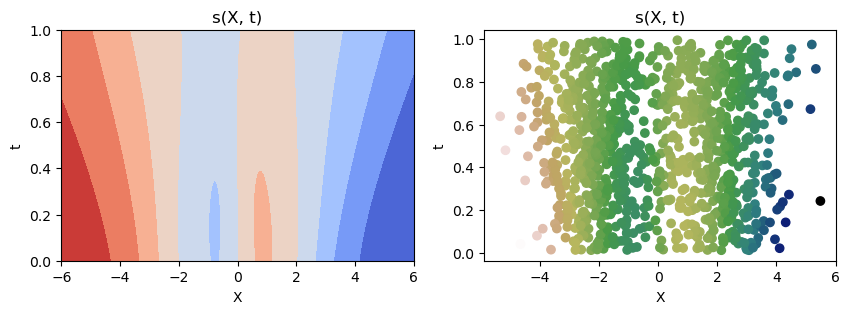

In [9]:
train_model_gauss_DSM(N, mu, sigma)